In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

import os
import sys
import math
import numpy.linalg

import scipy.stats as stat

import index_haps as idh

#Bulk VAFS first

In [2]:
#Import data
variant_annotations_amps = pd.read_csv('../Data/VAF_Data/bulkVAF_data.tsv', sep = '\t', index_col = 0)

In [3]:
variant_annotations_amps

,TARGET_NAME,PATIENT,CHR,START,END,REF,ALT,GENE,PROTEIN_CHANGE,cDNA_CHANGE,TARGET_VAF_MEAN,Autotate_annot1,Autotate_annot2,VARIANT,sampleID_short,patient_init,celltype,Mean_VAF,Amplicon,pt_test
4,IID_H198302_T01_01_TD01,IID_H198302,4,106157152,106157152,C,T,TET2,p.Q685*,c.2053C>T,0.474,AUTO_OK,ONCOGENIC,TET2_p.Q685*,T01_01_TD01,PD7153,BM,0.474,PD7153_TET2b,PD7153
5,IID_H198302_T02_01_TD01,IID_H198302,4,106157152,106157152,C,T,TET2,p.Q685*,c.2053C>T,0.496,AUTO_OK,ONCOGENIC,TET2_p.Q685*,T02_01_TD01,PD7153,Mono,0.496,PD7153_TET2b,PD7153
6,IID_H198302_T03_01_TD01,IID_H198302,4,106157152,106157152,C,T,TET2,p.Q685*,c.2053C>T,0.452,AUTO_OK,ONCOGENIC,TET2_p.Q685*,T03_01_TD01,PD7153,nBC,0.452,PD7153_TET2b,PD7153
7,IID_H198302_T04_01_TD01,IID_H198302,4,106157152,106157152,C,T,TET2,p.Q685*,c.2053C>T,0.502,AUTO_OK,ONCOGENIC,TET2_p.Q685*,T04_01_TD01,PD7153,Neut,0.502,PD7153_TET2b,PD7153
8,IID_H198302_T01_01_TD01,IID_H198302,7,101882770,101882770,C,T,CUX1,p.Q1276*,c.3826C>T,0.084,AUTO_OK,ONCOGENIC,CUX1_p.Q1276*,T01_01_TD01,PD7153,BM,0.084,PD7153_CUX1,PD7153
9,IID_H198302_T02_01_TD01,IID_H198302,7,101882770,101882770,C,T,CUX1,p.Q1276*,c.3826C>T,0.074,AUTO_OK,ONCOGENIC,CUX1_p.Q1276*,T02_01_TD01,PD7153,Mono,0.074,PD7153_CUX1,PD7153
10,IID_H198302_T04_01_TD01,IID_H198302,7,101882770,101882770,C,T,CUX1,p.Q1276*,c.3826C>T,0.033,AUTO_OK,ONCOGENIC,CUX1_p.Q1276*,T04_01_TD01,PD7153,Neut,0.033,PD7153_CUX1,PD7153
16,IID_H198302_T01_01_TD01,IID_H198302,17,74732959,74732959,G,T,SRSF2,p.P95H,c.284C>A,0.437,RESCUE,ONCOGENIC,SRSF2_p.P95H,T01_01_TD01,PD7153,BM,0.437,PD7153_SRSF2,PD7153
17,IID_H198302_T02_01_TD01,IID_H198302,17,74732959,74732959,G,T,SRSF2,p.P95H,c.284C>A,0.441,RESCUE,ONCOGENIC,SRSF2_p.P95H,T02_01_TD01,PD7153,Mono,0.441,PD7153_SRSF2,PD7153
18,IID_H198302_T03_01_TD01,IID_H198302,17,74732959,74732959,G,T,SRSF2,p.P95H,c.284C>A,0.438,AUTO_OK,ONCOGENIC,SRSF2_p.P95H,T03_01_TD01,PD7153,nBC,0.438,PD7153_SRSF2,PD7153


In [4]:
#Create empty values for PD7151 missing amplicon
cs = list(variant_annotations_amps.columns)
blank1 = ['TARGET_NAME',
 'PATIENT',
 'CHR',
 'START',
 'END',
 'REF',
 'ALT',
 'GENE',
 'PROTEIN_CHANGE',
 'cDNA_CHANGE',
 'TARGET_VAF_MEAN',
 'Autotate_annot1',
 'Autotate_annot2',
 'VARIANT',
 'sampleID_short',
 'PD7151',
 'Neut',
 '-0.1',
 'PD7151_TET2a',
 'PD7151']
blank2 = ['TARGET_NAME',
 'PATIENT',
 'CHR',
 'START',
 'END',
 'REF',
 'ALT',
 'GENE',
 'PROTEIN_CHANGE',
 'cDNA_CHANGE',
 'TARGET_VAF_MEAN',
 'Autotate_annot1',
 'Autotate_annot2',
 'VARIANT',
 'sampleID_short',
 'PD7151',
 'Neut',
 '-0.21',
 'PD7151_TET2b',
 'PD7151']
blank3 = ['TARGET_NAME',
 'PATIENT',
 'CHR',
 'START',
 'END',
 'REF',
 'ALT',
 'GENE',
 'PROTEIN_CHANGE',
 'cDNA_CHANGE',
 'TARGET_VAF_MEAN',
 'Autotate_annot1',
 'Autotate_annot2',
 'VARIANT',
 'sampleID_short',
 'PD7151',
 'Neut',
 '-0.15',
 'PD7151_SRSF2',
 'PD7151']
blank = pd.DataFrame(np.array([blank1, blank2, blank3]),columns=cs)

In [5]:
#Create a new df with the blank values and rearrange for plotting
var_ann_blank = pd.concat([variant_annotations_amps, blank])
var_ann_blank = var_ann_blank[['celltype', 'Mean_VAF', 'Amplicon', 'patient_init']]
var_ann_blank.sort_values(by=['Amplicon'], inplace = True)
var_ann_blank.sort_values(by=['celltype'], inplace = True)

In [6]:
#Rearrange again
patients = ['PD7153', 'PD7151', 'JP001']
alt_id = ['H198302', 'H198303', 'H198304']
pt_label = dict(zip(patients, alt_id))

all_amps = ['PD7153_TET2a',
            'PD7151_TET2a',
            'JP001_TET2a',
            'PD7153_TET2b',
            'PD7151_TET2b',
            'JP001_TET2b_g',
            'PD7153_SRSF2',
            'PD7151_SRSF2',
            'JP001_SRSF2',
            'PD7153_CUX1',
            'JP001_RUNX1_g'
           ]
short_label = ['TET2[a]',
               'TET2[a]',
               'TET2[a]',
               'TET2[b]',
               'TET2[b]',
               'TET2[b]',
               'SRSF2',
               'SRSF2',
               'SRSF2',
               'CUX1',
               'RUNX1'
              ]
relabel = dict(zip(all_amps, short_label))
colors = sns.color_palette('husl', n_colors = len(all_amps))
allVAFcols = dict(zip(all_amps, colors))

cell_order = ['BM', 'Mono', 'Neut', 'nBC']
cell_order_map = {x:i for i, x in enumerate(cell_order)}

var_ann_blank['x_value'] = var_ann_blank['celltype'].map(cell_order_map)

var_ann_blank.loc[var_ann_blank['Amplicon'] == 'JP001_SRSF2', 'x_value'] -= 0.12
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'JP001_TET2a', 'x_value'] -= 0.04
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'JP001_TET2b_g', 'x_value'] += 0.04
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'JP001_RUNX1_g', 'x_value'] += 0.12

var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7153_TET2b', 'x_value'] -= 0.12
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7153_TET2a', 'x_value'] -= 0.04
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7153_SRSF2', 'x_value'] += 0.04
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7153_CUX1', 'x_value'] += 0.12

var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7151_TET2b', 'x_value'] -= 0.08
#var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7151_TET2a', 'x_value'] += 0.00
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7151_SRSF2', 'x_value'] += 0.08

In [7]:
#Create proxy artists for legend
f,ax = plt.subplots()
JP001_labels = [ 'JP001_TET2a',  'JP001_TET2b_g', 'JP001_SRSF2', 'JP001_RUNX1_g']
JP001_handles = []
for lab in JP001_labels:
    line = ax.scatter([0], [0], label=lab, color=allVAFcols[lab], alpha = 0.5, s = 60, edgecolor = 'black')
    JP001_handles.append(line)
JP001_labels_r = [relabel.get(x) for x in JP001_labels]    

PD7153_labels = [ 'PD7153_TET2a', 'PD7153_TET2b','PD7153_SRSF2', 'PD7153_CUX1']
PD7153_handles = []
for lab in PD7153_labels:
    line = ax.scatter([0], [0], label=lab, color=allVAFcols[lab], alpha = 0.5, s = 60, edgecolor = 'black')
    PD7153_handles.append(line)
PD7153_labels_r = [relabel.get(x) for x in PD7153_labels]  

PD7151_labels = ['PD7151_TET2a', 'PD7151_TET2b', 'PD7151_SRSF2']
PD7151_handles = []
for lab in PD7151_labels:
    line = ax.scatter([0], [0], label=lab, color=allVAFcols[lab], alpha = 0.5, s = 60, edgecolor = 'black')
    PD7151_handles.append(line)
PD7151_labels_r = [relabel.get(x) for x in PD7151_labels]  

m_shapes = ['*', 's', 'p', '^' ]
cs = ['BM', 'Mono', 'Neut', 'nBC']
m_style = dict(zip(cs, m_shapes))

cs_labels = ['BM', 'Mono', 'Neut', 'nBC']
cs_handles = []
for lab in cs_labels:
    marker = m_style[lab]
    line = ax.scatter([0], [0], label=lab, marker = marker, color = 'white', alpha = 0.5, s = 60, edgecolor = 'black')
    cs_handles.append(line)
plt.close(f)

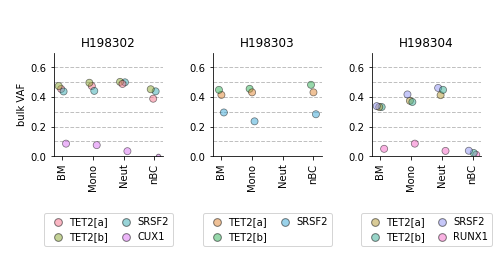

In [8]:
#Plot the VAFS
fig, (ax1,ax) = plt.subplots(2, 3, figsize = (7,4), gridspec_kw = dict(height_ratios = [1,4]), sharex = True)

#Adding dummy plot at top to match spacing exactly with scVAF plot
for count, patient in enumerate(patients):
    ax1[count].set_yscale('log')
    ax1[count].set_ylim(1, 1000)
    ax1[count].set_yticks([1, 10, 100, 1000])
    ax1labels = ['', 10, 100, 1000]
    ax1[count].set_yticklabels(ax1labels, color = 'white') 
    #ax1[count].set_title(f'{patient}') 
    ax1[count].spines['top'].set_visible(False)
    ax1[count].spines['right'].set_visible(False)
    ax1[count].spines['bottom'].set_visible(False)
    ax1[count].spines['left'].set_visible(False)
    ax1[count].tick_params(axis='x', colors='white')
    ax1[count].tick_params(axis='y', colors='white')    
    if count != 0:
        ax1[count].set_yticklabels([])
    else:
        ax1[count].set_ylabel('Cell #', color = 'white')

for count, patient in enumerate(patients):
    plot_data = var_ann_blank.loc[var_ann_blank['patient_init'].isin([patient])]
    
    x = plot_data['x_value']
    y = plot_data['Mean_VAF']
    
    sns.scatterplot(x, y , data = plot_data,  s = 50, hue = 'Amplicon', palette = allVAFcols, alpha = 0.5, edgecolor = 'black', ax = ax[count])
    
    
    handles, labels = ax[count].get_legend_handles_labels()
    lbl = []
    for lb in labels[1:]:
        lbl.append(relabel[lb])    
    
    lgd = ax[count].legend(loc = 'upper left', bbox_to_anchor = [-0.1,-0.3], columnspacing = 0.8, handletextpad=0.1, ncol = 2, markerscale = 1.2, handles=handles[1:], labels=lbl)
    #ax[count].set_title(f'{patient}') 
    ax[count].set_ylim(0,0.7)
    ax[count].axhline(0.1, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.2, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.3, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.4, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.5, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.6, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].set_ylabel('')
    ax[count].set_xlabel('')
    ax[count].tick_params(axis='x', labelrotation = 90)
    ax[count].margins(x=0.1)
    ax[count].set_xticks(np.arange(len(cell_order)))
    ax[count].set_xticklabels(cell_order)
    pl = pt_label[patient]
    ax[count].set_title(f'{pl}')

    ax[count].spines['top'].set_visible(False)
    ax[count].spines['right'].set_visible(False)
    
    if count == 0:
        ax[count].set_ylabel('bulk VAF')
    
    for lh in lgd.legendHandles: 
        lh.set_alpha(0.5)
        lh.set_edgecolor('black')

#Plot 0 for undetected CUX1 in PD7153 nBC
x = 3.12
y = 0
color = allVAFcols['PD7153_CUX1']
ax[0].scatter(x, y ,  s = 20, color = color, alpha = 0.5, edgecolor = 'black')        

#Add legends

ax[2].legend(handles = JP001_handles, labels = JP001_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)
ax[0].legend(handles = PD7153_handles, labels = PD7153_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)
ax[1].legend(handles = PD7151_handles, labels = PD7151_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)
        
plt.rcParams['svg.fonttype'] = 'none'  
fig.tight_layout(h_pad = 0, w_pad = 2)     

fig.savefig('../Results/Bulk_VAFs.svg',bbox_inches='tight', dpi = 600)
fig.savefig('../Results/Bulk_VAFs.png',bbox_inches='tight', dpi = 600)

#Now the scVAFs

In [9]:
sourcefile = '../Data/Amp_data/allele_counts_anon.tsv'
metadata = '../Data/Amp_data/Amplicon_metadata_fixed_anon.xlsx'
pt_id = 'PD7151'
plate = idh.data_retrieval(sourcefile, metadata, pt_id)
reads = 10
plate1_PD7151 = idh.calc_scVAF_mod(plate, pt_id, reads)

PD7151
Cells with 10 reads for amplicon PD7151_TET2a  =  1230
Mono 508
Neut 175
CD34 324
nBC 223
Cells with 10 reads for amplicon PD7151_TET2b  =  3156
Mono 710
Neut 709
CD34 1033
nBC 704
{'PD7151_TET2b': 0, 'PD7151_TET2a': 1}


In [10]:
pt_id = 'PD7153'
plate = idh.data_retrieval(sourcefile, metadata, pt_id)
PD7153data = plate.copy()
reads = 10
plate1_PD7153 = idh.calc_scVAF_mod(plate, pt_id, reads)

PD7153
Cells with 10 reads for amplicon PD7153_SRSF2  =  1325
Mono 322
Neut 165
nBC 21
CD34 817
Cells with 10 reads for amplicon PD7153_TET2a  =  2158
Mono 548
Neut 614
nBC 59
CD34 937
Cells with 10 reads for amplicon PD7153_TET2b  =  1957
Mono 555
Neut 468
nBC 22
CD34 912
{'PD7153_TET2b': 0, 'PD7153_SRSF2': 1, 'PD7153_TET2a': 2}


In [11]:
pt_id = 'JP001'
plate = idh.data_retrieval(sourcefile, metadata, pt_id)
reads = 10
plate1_JP001 = idh.calc_scVAF_mod(plate, pt_id, reads)

JP001
Cells with 10 reads for amplicon JP001_RUNX1_g  =  2948
Mono 643
Neut 633
nBC 698
CD34 974
Cells with 10 reads for amplicon JP001_SRSF2  =  2618
Mono 643
Neut 260
nBC 737
CD34 978
Cells with 10 reads for amplicon JP001_TET2a  =  2872
Mono 634
Neut 647
nBC 692
CD34 899
Cells with 10 reads for amplicon JP001_TET2b_g  =  332
Mono 55
Neut 207
nBC 52
CD34 18
{'JP001_SRSF2': 0, 'JP001_TET2a': 1, 'JP001_TET2b_g': 2, 'JP001_RUNX1_g': 3}


In [12]:
#Combine data from all patients
frames = [plate1_JP001, plate1_PD7153, plate1_PD7151]
plate1_all = pd.concat(frames)

pt_test = []
for index, row in plate1_all.iterrows():
    pt_test.append(row['Amplicon'].split('_')[0])

plate1_all['Pt'] = pt_test

In [13]:
#Rearrange and include cell numbers
pts = ['PD7153', 'PD7151', 'JP001']

all_amps = ['PD7153_TET2a',
            'PD7151_TET2a',
            'JP001_TET2a',
            'PD7153_TET2b',
            'PD7151_TET2b',
            'JP001_TET2b_g',
            'PD7153_SRSF2',
            'PD7151_SRSF2',
            'JP001_SRSF2',
            'PD7153_CUX1',
            'JP001_RUNX1_g'
           ]
short_label = ['TET2[a]',
               'TET2[a]',
               'TET2[a]',
               'TET2[b]',
               'TET2[b]',
               'TET2[b]',
               'SRSF2',
               'SRSF2',
               'SRSF2',
               'CUX1',
               'RUNX1'
              ]
relabel = dict(zip(all_amps, short_label))
colors = sns.color_palette('husl', n_colors = len(all_amps))
allVAFcols = dict(zip(all_amps, colors))

#Convert categoricals to numbers on x axis
cell_order = ['CD34', 'Mono', 'Neut', 'nBC']
cell_order_map = {x:i for i, x in enumerate(cell_order)}

plate1_all['x_value'] = plate1_all['sort_celltype'].map(cell_order_map)

#Nudge all the points by tweaking x value
plate1_all.loc[plate1_all['Amplicon'] == 'JP001_SRSF2', 'x_value'] -= 0.12
plate1_all.loc[plate1_all['Amplicon'] == 'JP001_TET2a', 'x_value'] -= 0.04
plate1_all.loc[plate1_all['Amplicon'] == 'JP001_TET2b_g', 'x_value'] += 0.04
plate1_all.loc[plate1_all['Amplicon'] == 'JP001_RUNX1_g', 'x_value'] += 0.12

plate1_all.loc[plate1_all['Amplicon'] == 'PD7153_TET2b', 'x_value'] -= 0.12
plate1_all.loc[plate1_all['Amplicon'] == 'PD7153_TET2a', 'x_value'] -= 0.04
plate1_all.loc[plate1_all['Amplicon'] == 'PD7153_SRSF2', 'x_value'] += 0.04
plate1_all.loc[plate1_all['Amplicon'] == 'PD7153_CUX1', 'x_value'] += 0.12

plate1_all.loc[plate1_all['Amplicon'] == 'PD7151_TET2b', 'x_value'] -= 0.08 #Was 0.04 w/o SRSF2
#plate1_all.loc[plate1_all['Amplicon'] == 'PD7151_TET2a', 'x_value'] += 0.00
plate1_all.loc[plate1_all['Amplicon'] == 'PD7151_SRSF2', 'x_value'] += 0.08

In [14]:
bd_df = plate1_all.copy()
#Nudge all the points a bit further for bar plots
bd_df.loc[bd_df['Amplicon'] == 'JP001_SRSF2', 'x_value'] -= 0.15
bd_df.loc[bd_df['Amplicon'] == 'JP001_TET2a', 'x_value'] -= 0.05
bd_df.loc[bd_df['Amplicon'] == 'JP001_TET2b_g', 'x_value'] += 0.05
bd_df.loc[bd_df['Amplicon'] == 'JP001_RUNX1_g', 'x_value'] += 0.15

bd_df.loc[bd_df['Amplicon'] == 'PD7153_TET2b', 'x_value'] -= 0.15
bd_df.loc[bd_df['Amplicon'] == 'PD7153_TET2a', 'x_value'] -= 0.05
bd_df.loc[bd_df['Amplicon'] == 'PD7153_SRSF2', 'x_value'] += 0.05
bd_df.loc[bd_df['Amplicon'] == 'PD7153_CUX1', 'x_value'] += 0.15

bd_df.loc[bd_df['Amplicon'] == 'PD7151_TET2b', 'x_value'] -= 0.1 #was 0.5 w/o SRSF2
#bd_df.loc[bd_df['Amplicon'] == 'PD7151_TET2a', 'x_value'] += 0.0
bd_df.loc[bd_df['Amplicon'] == 'PD7151_SRSF2', 'x_value'] += 0.1

bar_data = bd_df.groupby(['Pt', 'sort_celltype', 'Amplicon']).mean()
bar_data['Pt'] = bar_data.index.get_level_values(0)
bar_data['Amplicon'] = bar_data.index.get_level_values(2)

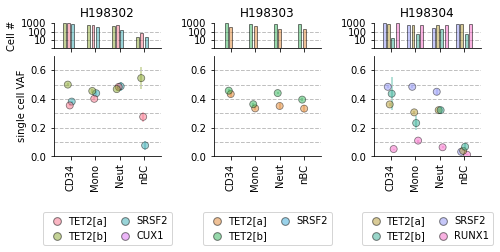

In [15]:
#plot the data
fig, (ax1,ax2) = plt.subplots(2, 3, figsize = (7,4), gridspec_kw = dict(height_ratios = [1,4]), sharex = True) 

ax = ax1
for count, pt in enumerate(pts):
    data = bar_data.loc[bar_data['Pt'].isin([pt])]
    
    for i, row in data.iterrows():
        x = row['x_value']
        y = row['cell_count']
        color = allVAFcols[row['Amplicon']]
        
        ax[count].bar([x], [y], width = 0.12, color = color, alpha = 0.5,  edgecolor = 'black')
    
    ax[count].set_xticks(np.arange(len(cell_order)))
    ax[count].set_xticklabels(cell_order)
    ax[count].set_yscale('log')
    ax[count].set_ylim(1, 1000)
    ax[count].set_yticks([1, 10, 100, 1000])
    ax1labels = ['', 10, 100, 1000]
    ax[count].set_yticklabels(ax1labels)
    ax[count].spines['top'].set_visible(False)
    ax[count].spines['right'].set_visible(False)
    if count == 0:
        ax[count].set_ylabel('Cell #')
    
    ax[count].axhline(10, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(100, ls = '--', c = 'silver', lw = 1, zorder = 0)

ax = ax2

for count, pt in enumerate(pts):
    
    data = plate1_all.loc[plate1_all['Pt'].isin([pt])]
    
    sns.scatterplot(x = 'x_value', y = 'VAF', data = data, s = 50, hue = 'Amplicon', palette = allVAFcols,  edgecolor = 'black', alpha = 0.5, ax = ax[count])
    handles, labels = ax[count].get_legend_handles_labels() 
    
    #Plot sem bars
    for i, row in data.iterrows():
        x = row['x_value']
        y = row['VAF']
        e = row['sem']
        color = allVAFcols[row['Amplicon']]
        
        ax[count].errorbar(x, y, yerr=e, fmt='.', color = color, ms = 0, alpha = 0.5, zorder = 0)
    
    #rename labels for amplicons
    lbl = [] 

    for lb in labels:
        if lb not in all_amps:
            lbl.append(lb)
        else:
            lbl.append(relabel[lb])
                
    
    if pt == 'JP001':
        lgd = ax[count].legend(loc = 'upper left', bbox_to_anchor = [-0.1,-0.3], columnspacing = 0.8, handletextpad=0.1, ncol = 2, markerscale = 1.2, handles=handles[1:5], labels=lbl[1:5])
    elif pt == 'PD7153':
        lgd = ax[count].legend(loc = 'upper left', bbox_to_anchor = [-0.1,-0.3], columnspacing = 0.8, handletextpad=0.1, ncol = 2, markerscale = 1.2, handles=handles[1:4], labels=lbl[1:4])
    elif pt == 'PD7151':
        lgd = ax[count].legend(loc = 'upper left', bbox_to_anchor = [-0.1,-0.3], columnspacing = 0.8, handletextpad=0.1, ncol = 2, markerscale = 1.2, handles=handles[1:3], labels=lbl[1:3])
    
    ax[count].set_ylim(0,0.7)
    ax[count].axhline(0.1, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.2, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.3, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.4, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.5, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.6, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].set_ylabel('')
    ax[count].set_xlabel('')
    ax[count].tick_params(axis='x', labelrotation = 90)
    pl = pt_label[pt]
    ax1[count].set_title(f'{pl}')
    ax[count].margins(x=0.1)
    
    if count == 0:
        ax[count].set_ylabel('single cell VAF')

        
    
    #Manually adjust ticks and labels since now plotting at arbitrary x values
    ax[count].set_xticks(np.arange(len(cell_order)))
    ax[count].set_xticklabels(cell_order)
    
    ax[count].spines['top'].set_visible(False)
    ax[count].spines['right'].set_visible(False)
    
    for lh in lgd.legendHandles: 
        lh.set_alpha(0.5)
        lh.set_edgecolor('black')
        
    #print(lbl)
        
#Add legends

ax[2].legend(handles = JP001_handles, labels = JP001_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)
ax[0].legend(handles = PD7153_handles, labels = PD7153_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)
ax[1].legend(handles = PD7151_handles, labels = PD7151_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)

plt.rcParams['svg.fonttype'] = 'none'    
fig.tight_layout(h_pad = 0, w_pad = 2)  

fig.savefig('../Results/sc_VAFs_cell_no.svg',bbox_inches='tight', dpi = 600)
fig.savefig('../Results/sc_VAFs_cell_no.png',bbox_inches='tight', dpi = 600)

#Now plot sc vs bulk

In [16]:
#bulk data
bulk_data = variant_annotations_amps.copy()
bulk_data = bulk_data[['celltype', 'Mean_VAF', 'Amplicon', 'patient_init']]
bulk_data.columns = ['ct', 'b_VAF', 'amplicon', 'pt']
bulk_data['b_ct'] = bulk_data['ct']
bulk_data.shape[0]

39

In [17]:
#sc data
sc_data = plate1_all.copy()
sc_data.columns = ['s_VAF', 'ct', 'amplicon', 's_sem', 's_count', 'pt', 'offset']
sc_data['s_ct'] = sc_data['ct'] #retain old designation for QC
#Rename CD34 to BM for merging
s_rename = {'CD34':'BM'}
sc_data['ct'].replace(s_rename, inplace = True)
sc_data.shape[0]
#sc_data

36

In [18]:
#Merge data
all_VAF = sc_data.merge(bulk_data, on = ['pt', 'ct', 'amplicon'])

All pt/amps (0.8377920247659048, 1.1937224982658664e-09)
PD7153 (0.5721370202515634, 0.05191245444355426)
PD7151 (0.05057438580517759, 0.9242031000776822)
JP001 (0.9024018590637137, 4.184677552895131e-06)


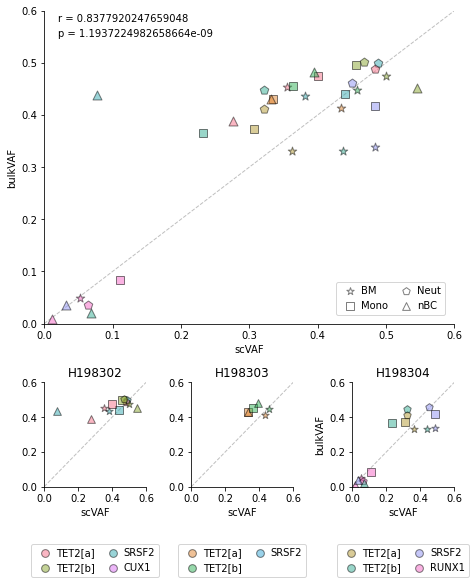

In [19]:
#Plot correlations
#TODO - plot line of fit (but not sure exactly how Fabio suggested to do this)

pts = ['PD7153', 'PD7151', 'JP001']
alt_id = ['H198302', 'H198303', 'H198304']
pt_label = dict(zip(pts, alt_id))

#Note that marker style ditionary is created at the top with the proxy artist for legends

print('All pt/amps', stat.pearsonr(all_VAF['s_VAF'], all_VAF['b_VAF']))
rs = stat.pearsonr(all_VAF['s_VAF'], all_VAF['b_VAF'])[0]
pv = stat.pearsonr(all_VAF['s_VAF'], all_VAF['b_VAF'])[1]


#Create plots
    
#x_list = []
#y_list = []

fig = plt.figure(constrained_layout=True, figsize = (6.5, 8))
gs = fig.add_gridspec(2, 3, height_ratios = [3,1], hspace = 1)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1 :,0])
ax2 = fig.add_subplot(gs[1 :,1])
ax3 = fig.add_subplot(gs[1 :,2])

ax_names = [ax1, ax2, ax3]
an = dict(zip(pts, ax_names))

ax = ax0

#Upper plot

for i, row in all_VAF.iterrows():
    x = row['s_VAF']
    #x_list.append(x)
    y = row['b_VAF']
    #y_list.append(y)
    color = allVAFcols[row['amplicon']]
    marker = m_style[row['ct']]
    ax.scatter(x, y, color = color, alpha = 0.5, marker = marker, s = 80, edgecolor = 'black')

#Plot 1:1 correlation line
x = np.array([0, 0.2, 0.4, 0.6])
ax.plot(x, x, ls = '--', c = 'silver', lw = 1, zorder = 0)

ax.set_ylim(0,0.6)
ax.set_xlim(0,0.6)
ax.margins(x=0.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('bulkVAF')
ax.set_xlabel('scVAF')
#ax.text(0.3, 0.05, f'r = {rs}') #bottom right location
#ax.text(0.3, 0.02, f'p = {pv}') #bottom right location

ax.text(0.02, 0.58, f'r = {rs}') #upper left location
ax.text(0.02, 0.55, f'p = {pv}') #upper left location

#ax.set_title('All patients, all amplicons')

#Lower plots

for count, pt in enumerate(pts):
    
    data = all_VAF.loc[all_VAF['pt'].isin([pt])]

    #x_list = []
    #y_list = []

    for i, row in data.iterrows():
        ax = an[pt]
        x = row['s_VAF']
        #x_list.append(x)
        y = row['b_VAF']
        #y_list.append(y)
        color = allVAFcols[row['amplicon']]
        marker = m_style[row['ct']]
        ax.scatter(x, y, color = color, alpha = 0.5, s = 60, marker = marker, edgecolor = 'black')
    
    #Plot 1:1 correlation line
    x = np.array([0, 0.2, 0.4, 0.6])
    ax.plot(x, x, ls = '--', c = 'silver', lw = 1, zorder = 0)
    
    ax.set_ylim(0,0.6)
    ax.set_xlim(0,0.6)
    ax.margins(x=0.1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('scVAF')
    label = pt_label[pt]
    ax.set_title(f'{label}')
    
    if pt == 'JP001':
        ax.set_ylabel('bulkVAF')
    
    print(pt, stat.pearsonr(data['s_VAF'], data['b_VAF']))
    
#Add legends
ax0.legend(handles = cs_handles, labels = cs_labels, loc = 'upper left',bbox_to_anchor = [0.7,0.15], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)
ax3.legend(handles = JP001_handles, labels = JP001_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)
ax1.legend(handles = PD7153_handles, labels = PD7153_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)
ax2.legend(handles = PD7151_handles, labels = PD7151_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)

fig.savefig('../Results/allVAFs_composite.svg',bbox_inches='tight', dpi = 600)
fig.savefig('../Results/allVAFs_composite.png',bbox_inches='tight', dpi = 600)

In [20]:
#VAFS for extra cell types
extras = pd.read_excel('../Data/VAF_Data/JP001_newsort_sanger.xlsx', sheet_name = 'Sheet1')

#Add in numerical x location
cell_order2 = ['Mono', 'nBC', 'memB', 'nTC', 'memT', 'NK']
cell_order_map2 = {x:i for i, x in enumerate(cell_order2)}

extras['x_value'] = extras['Cells'].map(cell_order_map2)

#Tweak amplicon names so that color palette works
an = ['JP001_SRSF2','JP001_TET2a','JP001_TET2b_g','JP001_RUNX1_g']
ao = ['SRSF2','TET2a','TET2b','RUNX1']
gene_amp = dict(zip(ao, an))


extras['Amplicon'] = extras['Gene'].replace(gene_amp)

#Nudge all the points by tweaking x value
extras.loc[extras['Gene'] == 'SRSF2', 'x_value'] -= 0.12
extras.loc[extras['Gene'] == 'TET2a', 'x_value'] -= 0.04
extras.loc[extras['Gene'] == 'TET2b', 'x_value'] += 0.04
extras.loc[extras['Gene'] == 'RUNX1', 'x_value'] += 0.12
extras

,Cells,Gene,Well,WT,Mutant,VAF_freq,x_value,Amplicon
0,NK,RUNX1,B2,284,30,0.095541,5.12,JP001_RUNX1_g
1,nBC,RUNX1,B3,287,10,0.033670,1.12,JP001_RUNX1_g
2,memB,RUNX1,B4,287,10,0.033670,2.12,JP001_RUNX1_g
3,nTC,RUNX1,B5,287,10,0.033670,3.12,JP001_RUNX1_g
4,memT,RUNX1,B6,287,10,0.033670,4.12,JP001_RUNX1_g
5,Mono,RUNX1,B7,287,20,0.065147,0.12,JP001_RUNX1_g
6,NK,TET2a,C2,236,210,0.470852,4.96,JP001_TET2a
7,nBC,TET2a,C3,236,19,0.074510,0.96,JP001_TET2a
8,memB,TET2a,C4,236,10,0.040650,1.96,JP001_TET2a
9,nTC,TET2a,C5,236,11,0.044534,2.96,JP001_TET2a


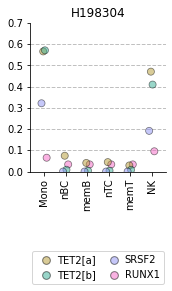

In [21]:
fig, ax = plt.subplots(figsize = (2.5,5))
sns.scatterplot(x = 'x_value', y = 'VAF_freq', data = extras, s = 50, hue = 'Amplicon', palette = allVAFcols,  edgecolor = 'black', alpha = 0.5, ax = ax)

handles, labels = ax.get_legend_handles_labels() 

ax.legend(handles = JP001_handles, labels = JP001_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)

ax.set_ylim(0,0.7)
ax.axhline(0.1, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.axhline(0.2, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.axhline(0.3, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.axhline(0.4, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.axhline(0.5, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.axhline(0.6, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis='x', labelrotation = 90)
ax.margins(x=0.1)

ax.set_xticks(np.arange(len(cell_order2)))
ax.set_xticklabels(cell_order2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('H198304')

for lh in lgd.legendHandles: 
    lh.set_alpha(0.5)
    lh.set_edgecolor('black')

plt.rcParams['svg.fonttype'] = 'none'    
fig.tight_layout(h_pad = 0, w_pad = 2)  

fig.savefig('../Results/extra_VAFs.svg',bbox_inches='tight', dpi = 600)
fig.savefig('../Results/extra_VAFs.png',bbox_inches='tight', dpi = 600)


In [22]:
#New captureVAFs from secondary sort
directory = '../Data/VAF_data/NZ_VAF/'
targets = ['TET2', 'SRSF2', 'RUNX1']
targs = ['p.Pro95Arg', 'p.Gly1218fs', 'p.Tyr1337', 'p.Ala187Thr']
ids = ['JP001_SRSF2','JP001_TET2a','JP001_TET2b_g','JP001_RUNX1_g']
targ_id = dict(zip(targs, ids))
pattern = '|'.join(targs)
samples = ['monocyte', 'DPlusCD27min', 'DminCD27plus', 'naiveT', 'memT','NK' ]
celltypes = ['Mono' , 'nBC', 'memB', 'nTC', 'memT', 'NK']
samp_ct = dict(zip(samples, celltypes))

#Create a list of the field extracted files
files = []
for fn in os.listdir(directory):
    if 'fields' in fn:
         files.append(fn)
            
sample_dict = {}

for f in files:
    sn = f.split('_')[2] #get the sample name
    ty = f.split('_')[8] #Is is a SNP or indel?
    samp = sn + '_' + ty #unique dictionary name
    df = pd.read_csv(f'../Data/VAF_data/NZ_VAF/{f}', sep = '\t')
    df['gene'] = df['ANN[*].GENE'].str.split('~').str[0]
    df['sample'] = sn
    df['type'] = ty
    df2 = df.loc[df['gene'].isin(targets)] #Just grab the tracked variants
    sample_dict[samp] = df2

#Combine all the samples in a single df
all_samples = pd.concat(sample_dict.values(), axis = 0)

for t in targs:
    all_samples[t] = all_samples['ANN[*].HGVS_P'].str.contains(t) #works out which rows have the desired mutations

all_samples['no_hit'] = (all_samples['ANN[*].HGVS_P'].str.contains(pattern)) == False

targs.append('no_hit')  #account for variants that were not tracked
ids.append('no_hit')

for a, b in zip(targs, ids):
    all_samples.loc[all_samples[a] == True, 'Amplicon'] = b 

all_samples['celltype'] = all_samples['sample'].replace(samp_ct)
all_samples['VAF'] = all_samples['GEN[*].FREQ'].str.rstrip('%').astype('float') / 100.0  #turn % call into a decimal

all_samples.to_excel('../Data/VAF_data/NZ_VAF/all_variants_target_genes.xlsx', index = None)

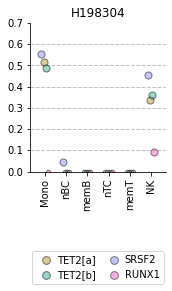

In [23]:
data = all_samples.loc[all_samples['no_hit'] == False]

ids2 = ['JP001_SRSF2','JP001_TET2a','JP001_TET2b_g','JP001_RUNX1_g']
nudge = [-0.15, -0.05, 0.05, 0.15 ]
idn = dict(zip(ids2, nudge))

fig, ax = plt.subplots(figsize = (2.5,5))
for i, c in enumerate(celltypes):
    for a in ids2:
        x = i + idn[a]
        color = allVAFcols[a]
        
        if data.loc[(data['celltype'] == c) & (data['Amplicon'] == a)].empty:
            y = 0 #dummy off scale plot for variants that weren't detected
            ax.scatter(x, y, color = color, alpha = 0.5,  s = 20, edgecolor = 'black')
        else:
            y = data.loc[(data['celltype'] == c) & (data['Amplicon'] == a)]['VAF'].to_list()[0]
            ax.scatter(x, y, color = color, alpha = 0.5,  s = 50, edgecolor = 'black')
        
        #ax.scatter(x, y, color = color, alpha = 0.5,  s = 80, edgecolor = 'black')

ax.set_ylim(0,0.7)
ax.axhline(0.1, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.axhline(0.2, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.axhline(0.3, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.axhline(0.4, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.axhline(0.5, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.axhline(0.6, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis='x', labelrotation = 90)
ax.margins(x=0.1)

ax.set_xticks(np.arange(len(celltypes)))
ax.set_xticklabels(celltypes)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('H198304')
ax.legend(handles = JP001_handles, labels = JP001_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)

for lh in lgd.legendHandles: 
    lh.set_alpha(0.5)
    lh.set_edgecolor('black')

plt.rcParams['svg.fonttype'] = 'none'    
fig.tight_layout(h_pad = 0, w_pad = 2)  

fig.savefig('../Results/extra_VAFs_NZ.svg',bbox_inches='tight', dpi = 600)
fig.savefig('../Results/extra_VAFs_NZ.png',bbox_inches='tight', dpi = 600)